min/max of vx:  -2.1216866970062256 2.061795473098755
min/max of vy:  -2.3500239849090576 2.1171748638153076
min/max of vz:  -2.2585175037384033 2.262071132659912


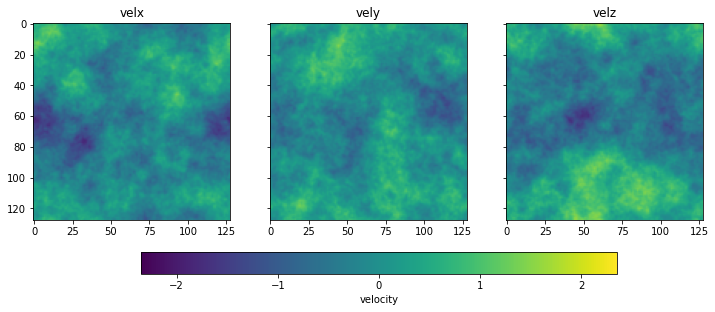

In [43]:
import numpy as np
import struct
import matplotlib.pyplot as plt

NDIR = 3

def _read_binary(fname, dim):
    N3 = dim**3
    file = open(fname, "rb")
    velx = np.array(struct.unpack('f'*N3, file.read(4*N3))).reshape(dim,dim,dim)
    vely = np.array(struct.unpack('f'*N3, file.read(4*N3))).reshape(dim,dim,dim)
    velz = np.array(struct.unpack('f'*N3, file.read(4*N3))).reshape(dim,dim,dim)
    file.close()
    return velx, vely, velz

dim=128

vx, vy, vz = _read_binary("vel3D.bin", dim)

# plot some numbers
# print some stats
mins = np.zeros(3)
maxs = np.zeros(3)
mins[0] = np.min(vx)
mins[1] = np.min(vy)
mins[2] = np.min(vz)
maxs[0] = np.max(vx)
maxs[1] = np.max(vy)
maxs[2] = np.max(vz)

print("min/max of vx: ", mins[0], maxs[0])
print("min/max of vy: ", mins[1], maxs[1])
print("min/max of vz: ", mins[2], maxs[2])

tot_mm = np.maximum(np.abs(np.min(mins)),np.abs(np.max(maxs)))

fig, ax = plt.subplots(figsize=(12,6),ncols=3, sharey=True)
im1 = ax[0].imshow(vx[dim//2,:,:], vmin=-tot_mm, vmax=tot_mm)
im2 = ax[1].imshow(vy[:,dim//2,:], vmin=-tot_mm, vmax=tot_mm)
im3 = ax[2].imshow(vz[:,:,dim//2], vmin=-tot_mm, vmax=tot_mm)
ax[0].set_title("velx")
ax[1].set_title("vely")
ax[2].set_title("velz")
cbar_ax = fig.add_axes([0.25, 0.15, 0.55, 0.05])
cbar = fig.colorbar(im1, cax=cbar_ax, orientation="horizontal")
cbar.set_label("velocity")
